<a href="https://colab.research.google.com/github/galaxy-kim/Python_note_backup/blob/main/230322_diet_datafile_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 정규화 (numeric 변수 -> standard scaler 적용, 자연로그 적용)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### 데이터 확인

In [3]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_이상치제거_1차.xlsx")
df

,Unnamed: 0,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,...,created_YMD,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g
0,0,webinner,4,6,1,170.0,62.0,0,0,61.0,...,2000-05-12,0,0,3,16560,MDGLIKE001,4,27,5,2
1,1,webinner,4,6,1,170.0,62.0,0,0,61.0,...,2000-05-12,0,0,3,16926,MDGLIKE001,4,27,5,2
2,2,webinner,4,6,1,170.0,62.0,0,0,61.0,...,2000-05-12,0,0,3,16941,MDGLIKE001,4,27,5,2
3,3,webinner,4,6,1,170.0,62.0,0,0,61.0,...,2000-05-12,0,0,3,16944,MDGLIKE001,4,27,5,2
4,4,webinner,4,6,1,170.0,62.0,0,0,61.0,...,2000-05-12,0,0,3,16967,MDGBEAT004,4,20,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,4445,akong2,4,3,2,164.0,57.0,0,1,52.0,...,2000-06-30,0,0,1,30378,MDFFUNC033,2,69,8,2
4446,4446,moondyda,3,15,2,147.0,42.0,0,0,39.0,...,2001-08-28,26,32,1,30380,MDEHRWE008,3,19,8,2
4447,4447,beanbird,4,15,2,165.0,55.0,0,1,50.0,...,2000-07-31,28,93,1,30382,MDEHRWE008,3,19,8,2
4448,4448,twotwotwo,4,14,2,159.0,65.0,1,1,50.0,...,2001-08-28,92,100,1,30385,MDEETCC008,3,39,8,4


In [4]:
df.drop(['Unnamed: 0'] , axis=1, inplace=True)

In [5]:
df

,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,weight_reduce,created_YMD,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g
0,webinner,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16560,MDGLIKE001,4,27,5,2
1,webinner,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16926,MDGLIKE001,4,27,5,2
2,webinner,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16941,MDGLIKE001,4,27,5,2
3,webinner,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16944,MDGLIKE001,4,27,5,2
4,webinner,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16967,MDGBEAT004,4,20,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,akong2,4,3,2,164.0,57.0,0,1,52.0,5.0,2000-06-30,0,0,1,30378,MDFFUNC033,2,69,8,2
4446,moondyda,3,15,2,147.0,42.0,0,0,39.0,3.0,2001-08-28,26,32,1,30380,MDEHRWE008,3,19,8,2
4447,beanbird,4,15,2,165.0,55.0,0,1,50.0,5.0,2000-07-31,28,93,1,30382,MDEHRWE008,3,19,8,2
4448,twotwotwo,4,14,2,159.0,65.0,1,1,50.0,15.0,2001-08-28,92,100,1,30385,MDEETCC008,3,39,8,4


In [6]:
df.columns

Index(['id', 'age_code', 'occupation', 'sex', 'height', 'weight', 'married',
       'dise_yn', 'want_diet', 'weight_reduce', 'created_YMD', 'waist', 'heap',
       'diet_purpose', 'order_id', 'pfid', 'p_category', 'p_price_000',
       'p_month', 'bmi_g'],
      dtype='object')

In [8]:
cat=df[['id', 'age_code', 'occupation', 'sex', 'married','dise_yn', 'diet_purpose', 'order_id', 'pfid', 'p_category', 'p_month', 'bmi_g']]
num=df[['height', 'weight','want_diet', 'weight_reduce', 'waist', 'heap','p_price_000']]

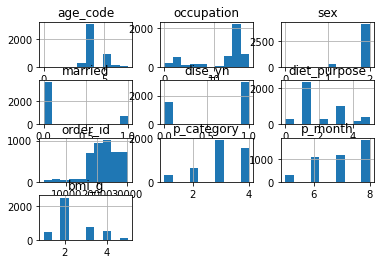

In [9]:
# Create histograms for each column
cat.hist(column=cat.columns)

# Show the plots
plt.show()

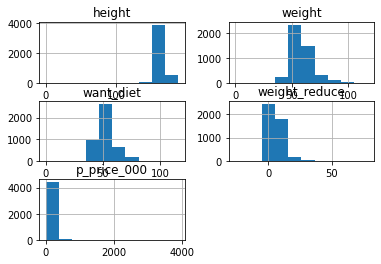

In [10]:
# Create histograms for each column
num.hist(column=num.columns)

# Show the plots
plt.show()

### label encoder : 문자 범주 -> 숫자 변환 (id, pfid)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
encoder = LabelEncoder()

# Apply the label encoder to the categorical column
df['id'] = encoder.fit_transform(df['id'])


In [13]:
df.head()

,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,weight_reduce,created_YMD,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g
0,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16560,MDGLIKE001,4,27,5,2
1,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16926,MDGLIKE001,4,27,5,2
2,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16941,MDGLIKE001,4,27,5,2
3,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16944,MDGLIKE001,4,27,5,2
4,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,2000-05-12,0,0,3,16967,MDGBEAT004,4,20,5,2


In [14]:
df['pfid'] = encoder.fit_transform(df['pfid'])
df.tail()

,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,weight_reduce,created_YMD,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g
4445,220,4,3,2,164.0,57.0,0,1,52.0,5.0,2000-06-30,0,0,1,30378,65,2,69,8,2
4446,2054,3,15,2,147.0,42.0,0,0,39.0,3.0,2001-08-28,26,32,1,30380,33,3,19,8,2
4447,387,4,15,2,165.0,55.0,0,1,50.0,5.0,2000-07-31,28,93,1,30382,33,3,19,8,2
4448,2983,4,14,2,159.0,65.0,1,1,50.0,15.0,2001-08-28,92,100,1,30385,12,3,39,8,4
4449,2983,4,14,2,159.0,65.0,1,1,50.0,15.0,2001-08-28,92,100,1,30385,36,3,9,8,4


In [15]:
df.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_이상치제거_2차.xlsx")

### id별 구매 횟수 열 추가

In [22]:
grouped_df = df[['id', 'p_price_000']].groupby('id').transform('count')
result_df = df.join(grouped_df, rsuffix='_idcount')
result_df


,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,weight_reduce,...,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g,p_price_000_idcount
0,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,...,0,0,3,16560,105,4,27,5,2,64
1,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,...,0,0,3,16926,105,4,27,5,2,64
2,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,...,0,0,3,16941,105,4,27,5,2,64
3,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,...,0,0,3,16944,105,4,27,5,2,64
4,3053,4,6,1,170.0,62.0,0,0,61.0,1.0,...,0,0,3,16967,81,4,20,5,2,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,220,4,3,2,164.0,57.0,0,1,52.0,5.0,...,0,0,1,30378,65,2,69,8,2,1
4446,2054,3,15,2,147.0,42.0,0,0,39.0,3.0,...,26,32,1,30380,33,3,19,8,2,1
4447,387,4,15,2,165.0,55.0,0,1,50.0,5.0,...,28,93,1,30382,33,3,19,8,2,3
4448,2983,4,14,2,159.0,65.0,1,1,50.0,15.0,...,92,100,1,30385,12,3,39,8,4,2


In [24]:
unique_values = df['age_code'].unique()
unique_values.sort()
print(unique_values)


[0 2 3 4 5 6 7]


In [30]:
age_df_2 = result_df[result_df['age_code'] == 2].sort_values(by='p_price_000_idcount', ascending=False)
age_df_2

,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,weight_reduce,...,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g,p_price_000_idcount
78,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,17770,134,4,15,5,2,14
250,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,18150,144,2,130,5,2,14
739,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19152,142,2,60,6,2,14
741,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19166,143,2,130,6,2,14
792,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19322,90,4,41,6,2,14
939,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19901,152,2,70,6,2,14
944,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19912,12,3,39,6,2,14
949,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19935,90,4,20,6,2,14
950,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19935,96,4,58,6,2,14
1022,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,20192,142,2,60,6,2,14


In [31]:
age_df_0 = result_df[result_df['age_code'] == 0].sort_values(by='p_price_000_idcount', ascending=False)
age_df_3 = result_df[result_df['age_code'] == 3].sort_values(by='p_price_000_idcount', ascending=False)
age_df_4 = result_df[result_df['age_code'] == 4].sort_values(by='p_price_000_idcount', ascending=False)
age_df_5 = result_df[result_df['age_code'] == 5].sort_values(by='p_price_000_idcount', ascending=False)
age_df_6 = result_df[result_df['age_code'] == 6].sort_values(by='p_price_000_idcount', ascending=False)
age_df_7 = result_df[result_df['age_code'] == 7].sort_values(by='p_price_000_idcount', ascending=False)


In [34]:
age_df_concat= pd.concat([age_df_0,age_df_2,age_df_3,age_df_4,age_df_5,age_df_6,age_df_7], axis=0)
age_df_concat

,id,age_code,occupation,sex,height,weight,married,dise_yn,want_diet,weight_reduce,...,waist,heap,diet_purpose,order_id,pfid,p_category,p_price_000,p_month,bmi_g,p_price_000_idcount
2032,796,0,12,2,162.0,57.0,0,0,48.0,9.0,...,28,0,1,17772,89,4,49,7,2,1
78,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,17770,134,4,15,5,2,14
250,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,18150,144,2,130,5,2,14
739,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19152,142,2,60,6,2,14
741,1014,2,12,2,167.0,52.0,1,0,50.0,2.0,...,27,30,1,19166,143,2,130,6,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2476,7,14,2,160.0,61.0,1,1,55.0,6.0,...,30,38,3,22943,39,3,12,7,3,1
2374,2727,7,14,2,158.0,72.0,1,1,68.0,4.0,...,0,0,3,22407,90,4,29,7,4,1
2299,723,7,12,2,160.0,55.0,1,0,52.0,3.0,...,0,0,0,22132,124,4,11,7,2,1
1195,63,7,14,2,166.0,65.0,1,0,60.0,5.0,...,0,0,0,20775,50,3,19,6,3,1


In [35]:
age_df_0.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_0.xlsx")
age_df_2.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_2.xlsx")
age_df_3.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_3.xlsx")
age_df_4.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_4.xlsx")
age_df_5.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_5.xlsx")
age_df_6.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_6.xlsx")
age_df_7.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_7.xlsx")
age_df_concat.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_concat.xlsx")


### 데이터 타입 변환 (오류값 mean값 대체)

In [36]:
age_df_concat.columns

Index(['id', 'age_code', 'occupation', 'sex', 'height', 'weight', 'married',
       'dise_yn', 'want_diet', 'weight_reduce', 'created_YMD', 'waist', 'heap',
       'diet_purpose', 'order_id', 'pfid', 'p_category', 'p_price_000',
       'p_month', 'bmi_g', 'p_price_000_idcount'],
      dtype='object')

In [39]:
age_df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450 entries, 2032 to 3540
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4450 non-null   int64         
 1   age_code             4450 non-null   int64         
 2   occupation           4450 non-null   int64         
 3   sex                  4450 non-null   int64         
 4   height               4450 non-null   float64       
 5   weight               4450 non-null   float64       
 6   married              4450 non-null   int64         
 7   dise_yn              4450 non-null   int64         
 8   want_diet            4450 non-null   float64       
 9   weight_reduce        4450 non-null   float64       
 10  created_YMD          4450 non-null   datetime64[ns]
 11  waist                4450 non-null   object        
 12  heap                 4450 non-null   object        
 13  diet_purpose         4450 non-

In [45]:

# convert column B to numeric and replace non-numeric values with NaN
age_df_concat['waist'] = pd.to_numeric(age_df_concat['waist'], errors='coerce')
age_df_concat['heap'] = pd.to_numeric(age_df_concat['heap'], errors='coerce')

# replace NaN values with the mean value of column B
mean_B = np.mean(age_df_concat[['waist', 'heap']])
age_df_concat[['waist', 'heap']] = age_df_concat[['waist', 'heap']].fillna(mean_B)


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [47]:
age_df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4450 entries, 2032 to 3540
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4450 non-null   int64         
 1   age_code             4450 non-null   int64         
 2   occupation           4450 non-null   int64         
 3   sex                  4450 non-null   int64         
 4   height               4450 non-null   float64       
 5   weight               4450 non-null   float64       
 6   married              4450 non-null   int64         
 7   dise_yn              4450 non-null   int64         
 8   want_diet            4450 non-null   float64       
 9   weight_reduce        4450 non-null   float64       
 10  created_YMD          4450 non-null   datetime64[ns]
 11  waist                4450 non-null   float64       
 12  heap                 4450 non-null   float64       
 13  diet_purpose         4450 non-

In [49]:
category=age_df_concat[['age_code', 'occupation', 'sex', 'married', 'dise_yn', 'diet_purpose', 'order_id', 'pfid', 'p_category', 'p_month', 'bmi_g']]
num=age_df_concat[['height', 'weight', 'want_diet', 'weight_reduce', 'waist', 'heap', 'p_price_000', 'p_price_000_idcount']]

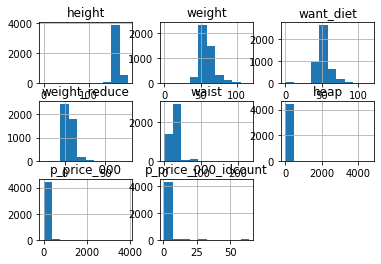

In [50]:
# Create histograms for each column
num.hist(column=num.columns)

# Show the plots
plt.show()

### StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [60]:
num_cols = ['height', 'weight', 'want_diet', 'weight_reduce', 'waist', 'heap', 'p_price_000', 'p_price_000_idcount']
num_data = age_df_concat[num_cols]

# Scale numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)


In [62]:
scaled_data=pd.DataFrame(scaled_data)

In [66]:
scaled_data.columns=['height', 'weight', 'want_diet', 'weight_reduce', 'waist', 'heap', 'p_price_000', 'p_price_000_idcount']

### 자연로그

In [67]:

# Create a sample DataFrame
df_log = scaled_data

# Select the columns you want to apply log1p to
cols_to_transform = ['height', 'weight', 'want_diet', 'weight_reduce', 'waist', 'heap', 'p_price_000', 'p_price_000_idcount']

# Apply log1p to the selected columns using apply()
df_log[cols_to_transform] = df_log[cols_to_transform].apply(np.log1p)


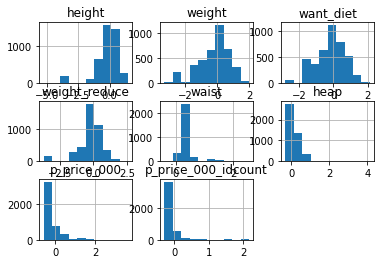

In [68]:
# Create histograms for each column
scaled_data.hist()

# Show the plots
plt.show()

## age code 별 데이터 분리 -> 새 데이터파일 생성


In [72]:
age_df_cat=age_df_concat
age_df_cat.drop(['height', 'weight', 'want_diet', 'weight_reduce', 'waist', 'heap', 'p_price_000', 'p_price_000_idcount'] , axis=1, inplace=True)
age_df_cat

,id,age_code,occupation,sex,married,dise_yn,created_YMD,diet_purpose,order_id,pfid,p_category,p_month,bmi_g
2032,796,0,12,2,0,0,2001-01-29,1,17772,89,4,7,2
78,1014,2,12,2,1,0,2000-05-10,1,17770,134,4,5,2
250,1014,2,12,2,1,0,2000-05-10,1,18150,144,2,5,2
739,1014,2,12,2,1,0,2000-05-10,1,19152,142,2,6,2
741,1014,2,12,2,1,0,2000-05-10,1,19166,143,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2476,7,14,2,1,1,2001-07-24,3,22943,39,3,7,3
2374,2727,7,14,2,1,1,2000-09-04,3,22407,90,4,7,4
2299,723,7,12,2,1,0,2001-07-13,0,22132,124,4,7,2
1195,63,7,14,2,1,0,2001-02-21,0,20775,50,3,6,3


In [73]:
age_df_scaled=age_df_cat.join(scaled_data)
age_df_scaled

,id,age_code,occupation,sex,married,dise_yn,created_YMD,diet_purpose,order_id,pfid,...,p_month,bmi_g,height,weight,want_diet,weight_reduce,waist,heap,p_price_000,p_price_000_idcount
2032,796,0,12,2,0,0,2001-01-29,1,17772,89,...,7,2,-0.853945,-2.404421,-1.727988,-0.304324,0.221760,0.175738,-0.291429,-0.278424
78,1014,2,12,2,1,0,2000-05-10,1,17770,134,...,5,2,0.554158,-1.191847,-1.221584,-0.092350,0.221760,0.175738,-0.179013,-0.124640
250,1014,2,12,2,1,0,2000-05-10,1,18150,144,...,5,2,-0.372977,-0.890791,-0.436759,-0.573663,0.266633,0.153034,-0.278296,-0.278424
739,1014,2,12,2,1,0,2000-05-10,1,19152,142,...,6,2,-0.049580,0.315081,0.382522,-0.092350,0.390302,0.141486,-0.179013,0.008616
741,1014,2,12,2,1,0,2000-05-10,1,19166,143,...,6,2,0.442382,-0.472129,-0.127413,-0.573663,0.309578,-0.323233,-0.239901,0.008616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2476,7,14,2,1,1,2001-07-24,3,22943,39,...,7,3,1.116851,1.191025,1.054812,0.671295,0.464994,0.230341,-0.304737,-0.278424
2374,2727,7,14,2,1,1,2000-09-04,3,22407,90,...,7,4,NaN,-0.177913,0.208424,-0.943422,0.350754,0.153034,-0.239901,-0.278424
2299,723,7,12,2,1,0,2001-07-13,0,22132,124,...,7,2,0.079831,NaN,NaN,0.082455,0.174779,-0.323233,-0.304737,-0.278424
1195,63,7,14,2,1,0,2001-02-21,0,20775,50,...,6,3,-0.372977,-2.404421,-1.727988,-0.304324,NaN,-0.323233,-0.403209,-0.124640


In [74]:
age_df_scaled.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/online_diet_age_scaled.xlsx")

In [76]:
age_0 = age_df_scaled[age_df_scaled['age_code'] == 0].sort_values(by='p_price_000_idcount', ascending=False)
age_2 = age_df_scaled[age_df_scaled['age_code'] == 2].sort_values(by='p_price_000_idcount', ascending=False)
age_3 = age_df_scaled[age_df_scaled['age_code'] == 3].sort_values(by='p_price_000_idcount', ascending=False)
age_4 = age_df_scaled[age_df_scaled['age_code'] == 4].sort_values(by='p_price_000_idcount', ascending=False)
age_5 = age_df_scaled[age_df_scaled['age_code'] == 5].sort_values(by='p_price_000_idcount', ascending=False)
age_6 = age_df_scaled[age_df_scaled['age_code'] == 6].sort_values(by='p_price_000_idcount', ascending=False)
age_7 = age_df_scaled[age_df_scaled['age_code'] == 7].sort_values(by='p_price_000_idcount', ascending=False)


In [83]:
age_0.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_0.xlsx")
age_2.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_2.xlsx")
age_3.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_3.xlsx")
age_4.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_4.xlsx")
age_5.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_5.xlsx")
age_6.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_6.xlsx")
age_7.to_excel("/content/drive/MyDrive/Colab Notebooks/ubion_given_data/diet_df/online_diet_age_7.xlsx")

In [84]:
age_2

,id,age_code,occupation,sex,married,dise_yn,created_YMD,diet_purpose,order_id,pfid,...,p_month,bmi_g,height,weight,want_diet,weight_reduce,waist,heap,p_price_000,p_price_000_idcount
739,1014,2,12,2,1,0,2000-05-10,1,19152,142,...,6,2,-0.049580,0.315081,0.382522,-0.092350,0.390302,0.141486,-0.179013,0.008616
741,1014,2,12,2,1,0,2000-05-10,1,19166,143,...,6,2,0.442382,-0.472129,-0.127413,-0.573663,0.309578,-0.323233,-0.239901,0.008616
792,1014,2,12,2,1,0,2000-05-10,1,19322,90,...,6,2,0.694857,-0.890791,-0.636756,-0.304324,NaN,-0.323233,-0.291429,0.008616
738,120,2,15,2,0,0,2000-06-13,0,19150,142,...,6,1,NaN,0.698332,0.876697,-0.573663,0.464994,-0.323233,0.648555,0.008616
78,1014,2,12,2,1,0,2000-05-10,1,17770,134,...,5,2,0.554158,-1.191847,-1.221584,-0.092350,0.221760,0.175738,-0.179013,-0.124640
939,1014,2,12,2,1,0,2000-05-10,1,19901,152,...,6,2,0.390369,0.698332,0.876697,-0.573663,1.544494,0.730079,-0.403209,-0.124640
944,1014,2,12,2,1,0,2000-05-10,1,19912,12,...,6,2,-0.584819,-1.191847,-1.221584,-0.092350,0.266633,-0.323233,-0.374071,-0.124640
949,1014,2,12,2,1,0,2000-05-10,1,19935,90,...,6,2,0.694857,-0.177913,0.108507,-0.573663,0.221760,0.175738,-0.265333,-0.124640
950,1014,2,12,2,1,0,2000-05-10,1,19935,96,...,6,2,0.554158,1.052138,0.969715,0.475266,1.441561,0.656514,-0.374071,-0.124640
1022,1014,2,12,2,1,0,2000-05-10,1,20192,142,...,6,2,0.079831,NaN,-2.804783,-0.943422,0.125482,0.175738,0.133050,-0.124640
